In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numba import njit

In [31]:
class Newton:
    def __init__(self, pars: dict) -> None:
        try:
            self.max_iter = pars["max_iter"]
        except:
            self.max_iter = 1
        try:
            self.res = pars["res"]
        except:
            self.res = [10, 10]
        try:
            self.r_lim = pars["r_lim"]
        except:
            self.r_lim = [-1, 1]
        try:
            self.j_lim = pars["j_lim"]
        except:
            self.j_lim = [-1, 1]
        # try:
        if pars["func"] == "cos":
            self.func = self.build_cos(pars["coefs"])
        elif pars["func"] == "sin":
            self.func = self.build_sin(pars["coefs"])
        elif pars["func"] == "exp":
            self.func = self.build_exp(pars["coefs"])
        else:
            self.func = self.build_pol(pars["coefs"])
        # except:
        #     print("HEY")
        #     self.func = self.build_pol([1,1,1])
        try:
            self.col = pars["col"]
        except:
            self.col ="jet"
        self.tol = 1e-6

        self.z = np.array([[complex(r,i) for r in np.linspace(self.r_lim[0],self.r_lim[1],self.res[0])] for i in np.linspace(self.j_lim[0],self.j_lim[1],self.res[1])],
                          dtype = np.complex64)

        self.z_ = self.z.copy()

    def build_pol(self, coefs):
        def pol(x):
            fx = sum([coefs[i] * x**i for i in range(len(coefs))])
            fxdx = sum([coefs[i] * x**(i-1) * i for i in range(1, len(coefs))])
            return x-fx/fxdx
        return pol

    def build_cos(self, coefs):
        def cos_(x):
            fx = coefs[0] + coefs[1] * np.cos( coefs[2] * x )
            fxdx = -coefs[1]*coefs[2]*np.sin( coefs[2] * x )
            return x-fx/fxdx
        return cos_

    def build_sin(self, coefs):
        def sin_(x):
            fx = coefs[0] * np.sin( coefs[1] * x )
            fxdx = coefs[0]*coefs[1]*np.cos( coefs[1] * x )
            return x-fx/fxdx
        return sin_

    def build_exp(self, coefs):
        def exp_(x):
            fx = coefs[0] * np.exp( coefs[1] * x )
            fxdx = coefs[0]*coefs[1]*np.exp( coefs[1] * x )
            return x-fx/fxdx
        return exp_

    def do_iter(self) -> None:
        i = 1
        self.z = self.func( self.z )
        diff = np.abs(self.z - self.z_)

        while np.nanmean(diff) > self.tol and i < self.max_iter:
            self.z_ = self.z.copy()
            self.z[diff > self.tol] = self.func( self.z[diff > self.tol] )
            diff = np.abs(self.z - self.z_)
            i+=1
        print(i, np.nanmean(np.abs(self.z - self.z_)))
    def do_plot(self) -> None:
        fig1, (ax) = plt.subplots(1, 1)
        cax= ax.imshow(np.abs(self.z),
                  extent=(self.r_lim[0], self.r_lim[1],self.j_lim[0], self.j_lim[1]),
                  cmap = self.col)
        fig1.colorbar(cax)
        plt.show()

26 5.304349e-07


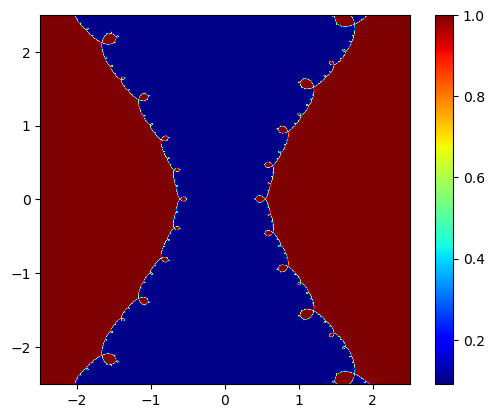

In [38]:
pars ={
        "coefs" : [0.1, 1, -0.1,-1],
        "func": "pol",
        "res" : [1000, 1000],
        "r_lim" : [-2.5, 2.5],
        "j_lim" : [-2.5, 2.5],
        "col" : "jet",
        "max_iter": 100,
    }

ns = Newton(pars)
ns.do_iter()
ns.do_plot()